### Save relevant plots to pdf (open)

In [58]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_file = PdfPages("relevant_plots.pdf")

# Build, train, test basic model

## Basic NN model

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim

# Aufbau des PyTorch-Modells
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1000, 64)  # 1000 Datenpunkte pro Sample
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)  # Für binäre Klassifikation (10 Hz oder 20 Hz)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Modell erstellen
model = SimpleNN()

# Optimizer und Loss-Funktion definieren
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  # Für binäre Klassifikation

## Synthetic Training Data

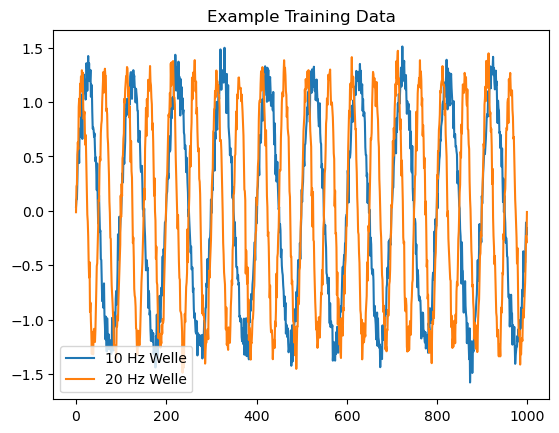

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Generierung von 10 Hz und 20 Hz Sinuswellen mit Rauschen und variierender Amplitude
def generate_training_data(num_samples=1000, noise_level=0.1):
    X = []
    y = []
    t = np.linspace(0, 1, 1000)  # 1 Sekunde mit 1000 Abtastpunkten
    
    for i in range(num_samples):
        if i % 2 == 0:
            # 10 Hz Sinuswelle
            amplitude = np.random.uniform(0.5, 1.5)  # Zufällige Amplitude
            wave = amplitude * np.sin(2 * np.pi * 10 * t)
            label = 0  # Label für 10 Hz Welle
        else:
            # 20 Hz Sinuswelle
            amplitude = np.random.uniform(0.5, 1.5)
            wave = amplitude * np.sin(2 * np.pi * 20 * t)
            label = 1  # Label für 20 Hz Welle
        
        # Füge Rauschen hinzu
        wave += np.random.normal(0, noise_level, size=t.shape)
        
        X.append(wave)
        y.append(label)
    
    X = np.array(X)
    y = np.array(y)
    
    # Konvertiere die Daten in PyTorch-Tensoren
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)
    
    return X, y

# Generiere die Trainingsdaten
X_train, y_train = generate_training_data(num_samples=1000, noise_level=0.1)

# Beispielplot einer 10 Hz und 20 Hz Sinuswelle
plt.plot(X_train[0].numpy(), label="10 Hz Welle")
plt.plot(X_train[1].numpy(), label="20 Hz Welle")
plt.title("Example Training Data")
plt.legend()
pdf_file.savefig()
plt.show()

## Training the Data

Epoche 1/50, Verlust: 0.0034, Trainingsgenauigkeit: 1.0000
Epoche 2/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 3/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 4/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 5/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 6/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 7/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 8/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 9/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 10/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 11/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 12/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 13/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 14/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 15/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 16/50, Verlust: 0.0000, Trainingsgenauigkeit: 1.0000
Epoche 17/50, Verlust: 0.0000, Trainingsgenauigke

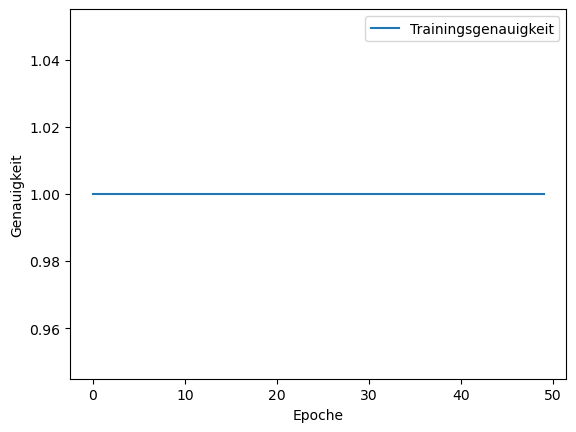

In [44]:
# Trainingsfunktion
def train_model(model, X_train, y_train, epochs=50, batch_size=32, lr=0.001):
    # Definiere den Verlust und den Optimierer
    criterion = nn.BCELoss()  # Da es eine binäre Klassifikation ist, verwenden wir den Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_accuracy = []
    val_accuracy = []

    # Trainingsloop
    for epoch in range(epochs):
        model.train()  # Setze das Modell in den Trainingsmodus
        running_loss = 0.0

        # Batches durchlaufen
        for i in range(0, len(X_train), batch_size):
            inputs = X_train[i:i+batch_size]
            labels = y_train[i:i+batch_size].unsqueeze(1)  # Konvertiere die Labels zu einem 2D-Tensor

            # Nullstelle die Gradienten
            optimizer.zero_grad()

            # Vorwärtsdurchlauf
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Rückwärtsdurchlauf und Optimierung
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Genauigkeit auf dem Trainings- und Validierungsdatensatz berechnen
        model.eval()  # Setze das Modell in den Evaluierungsmodus

        with torch.no_grad():
            train_outputs = model(X_train)
            train_predicted = (train_outputs > 0.5).float()
            train_accuracy_value = (train_predicted == y_train.unsqueeze(1)).float().mean().item()
            train_accuracy.append(train_accuracy_value)

        print(f'Epoche {epoch+1}/{epochs}, Verlust: {running_loss/len(X_train):.4f}, Trainingsgenauigkeit: {train_accuracy_value:.4f}')

    return train_accuracy

# Training durchführen
train_accuracy = train_model(model, X_train, y_train, epochs=50, batch_size=32)

# Plot der Trainingsgenauigkeit
plt.plot(train_accuracy, label='Trainingsgenauigkeit')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend()
plt.show()

## Generate Random Test-Data and Visualize Examples

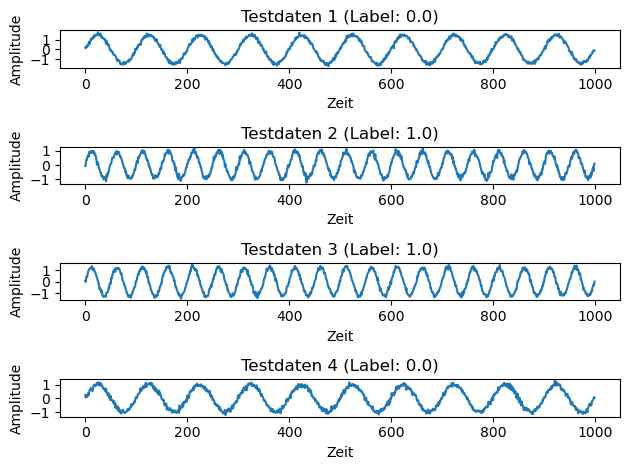

Klassifikationsergebnisse für die Testdaten:
Testdaten 1: Vorhergesagtes Label = 0.0, Tatsächliches Label = 0.0
Testdaten 2: Vorhergesagtes Label = 1.0, Tatsächliches Label = 1.0
Testdaten 3: Vorhergesagtes Label = 1.0, Tatsächliches Label = 1.0
Testdaten 4: Vorhergesagtes Label = 0.0, Tatsächliches Label = 0.0


In [60]:
import random

# Testdaten generieren
def generate_test_data(num_samples=100, noise_level=0.1):
    X_test = []
    y_test = []
    t = np.linspace(0, 1, 1000)  # 1 Sekunde mit 1000 Abtastpunkten

    for _ in range(num_samples):
        # Zufällig entscheiden, ob es eine 10 Hz oder 20 Hz Welle ist
        if random.choice([0, 1]) == 0:
            # 10 Hz Sinuswelle
            amplitude = np.random.uniform(0.5, 1.5)  # Zufällige Amplitude
            wave = amplitude * np.sin(2 * np.pi * 10 * t)
            label = 0  # Label für 10 Hz Welle
        else:
            # 20 Hz Sinuswelle
            amplitude = np.random.uniform(0.5, 1.5)
            wave = amplitude * np.sin(2 * np.pi * 20 * t)
            label = 1  # Label für 20 Hz Welle

        # Füge Rauschen hinzu
        wave += np.random.normal(0, noise_level, size=t.shape)

        X_test.append(wave)
        y_test.append(label)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Konvertiere die Daten in PyTorch-Tensoren
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    return X_test, y_test

# Generiere die Testdaten
X_test, y_test = generate_test_data(num_samples=100, noise_level=0.1)

# Visualisierung der ersten 4 Testdaten
for i in range(4):
    plt.subplot(4, 1, i + 1)
    plt.plot(X_test[i].numpy())
    plt.title(f'Testdaten {i + 1} (Label: {y_test[i].item()})')
    plt.xlabel('Zeit')
    plt.ylabel('Amplitude')

plt.tight_layout()
pdf_file.savefig()
plt.show()

# Klassifiziere die Testdaten mit dem trainierten Modell
model.eval()  # Setze das Modell in den Evaluierungsmodus
with torch.no_grad():
    test_outputs = model(X_test)
    test_predicted = (test_outputs > 0.5).float()

# Ausgabe der Klassifikationsergebnisse
print("Klassifikationsergebnisse für die Testdaten:")
for i in range(4):
    predicted_label = test_predicted[i].item()
    actual_label = y_test[i].item()
    print(f'Testdaten {i + 1}: Vorhergesagtes Label = {predicted_label}, Tatsächliches Label = {actual_label}')

# Analysis on single random Test-Data

## Choose, visualize and classify random wave

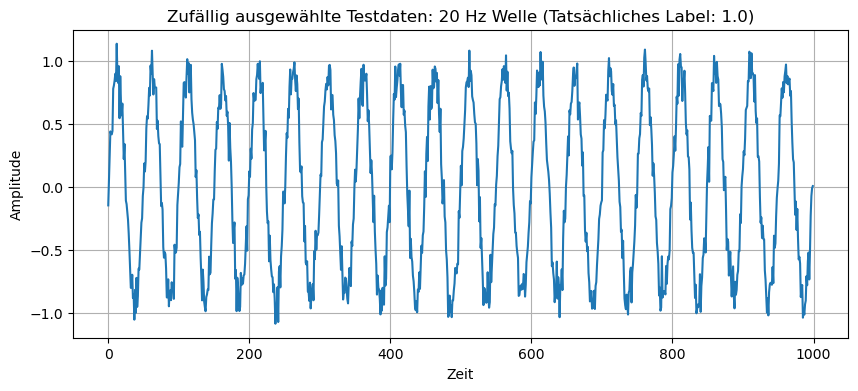

Tatsächliches Label: 1.0, Vorhergesagtes Label: 1.0
Die Klassifizierung stimmt mit dem tatsächlichen Label überein.


In [61]:
import random
import matplotlib.pyplot as plt

def select_random_wave(X_test, y_test):
    random_index = random.randint(0, len(X_test) - 1)  # Wähle einen zufälligen Index

    # Wähle die Testdaten und das Label aus
    selected_wave = X_test[random_index]
    actual_label = y_test[random_index].item()
    
    return selected_wave, actual_label

def visualize_wave(selected_wave, actual_label):
    # Bestimme den Titel basierend auf dem Label
    wave_type = "10 Hz Welle" if actual_label == 0 else "20 Hz Welle"

    # Visualisierung der ausgewählten Testdaten
    plt.figure(figsize=(10, 4))
    plt.plot(selected_wave.numpy())
    plt.title(f'Zufällig ausgewählte Testdaten: {wave_type} (Tatsächliches Label: {actual_label})')
    plt.xlabel('Zeit')
    plt.ylabel('Amplitude')
    plt.grid()
    pdf_file.savefig()
    plt.show()

def classify_and_check(selected_wave, actual_label, model):
    # Klassifiziere die ausgewählten Testdaten mit dem trainierten Modell
    model.eval()  # Setze das Modell in den Evaluierungsmodus
    with torch.no_grad():
        output = model(selected_wave.unsqueeze(0))  # Füge Batch-Dimension hinzu
        predicted_label = (output > 0.5).float().item()  # Klassifizierung 0 oder 1

    # Ausgabe der Klassifikationsergebnisse
    print(f'Tatsächliches Label: {actual_label}, Vorhergesagtes Label: {predicted_label}')
    
    # Überprüfung, ob die Vorhersage mit dem tatsächlichen Label übereinstimmt
    if predicted_label == actual_label:
        print("Die Klassifizierung stimmt mit dem tatsächlichen Label überein.")
    else:
        print("Die Klassifizierung stimmt NICHT mit dem tatsächlichen Label überein.")

def process_random_wave(selected_wave, actual_label, model):
    visualize_wave(selected_wave, actual_label)
    classify_and_check(selected_wave, actual_label, model)

# 'data' als einfacher name für die zufällig gewählte Welle, mit der wir weiterarbeiten
data, data_label = select_random_wave(X_test, y_test)


# Ergebnis
process_random_wave(data, data_label, model)

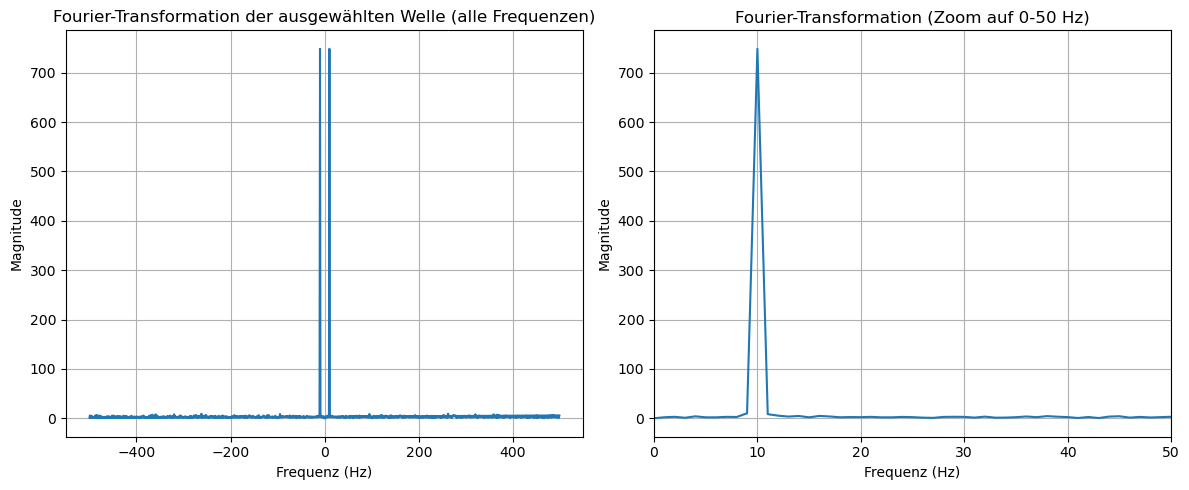

In [48]:
# Berechnung der Fourier-Transformation
data_fft = np.fft.fft(data.numpy())  # Konvertiere den Tensor in ein NumPy-Array

def visualize_fourier_transform(data_fft):
    # Berechne die Frequenzen für die x-Achse
    frequencies = np.fft.fftfreq(len(data_fft), d=1/1000)  # d=1/1000 für die Samplingrate von 1000 Hz

    # Berechne den Betrag der Fourier-Transformation
    fft_magnitude = np.abs(data_fft)

    # Erstelle eine Figur mit zwei Subplots
    plt.figure(figsize=(12, 5))

    # Erster Plot: Alle Frequenzen (positive und negative)
    plt.subplot(1, 2, 1)
    plt.plot(frequencies, fft_magnitude)
    plt.title('Fourier-Transformation der ausgewählten Welle (alle Frequenzen)')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()

    # Zweiter Plot: Nur die positive Frequenzhälfte
    plt.subplot(1, 2, 2)
    plt.plot(frequencies[:len(frequencies)//2], fft_magnitude[:len(fft_magnitude)//2])  # Nur die positive Frequenzhälfte
    plt.title('Fourier-Transformation (Zoom auf 0-50 Hz)')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.xlim(0, 50)  # Begrenze die x-Achse auf einen Bereich von 0 bis 50 Hz für bessere Sichtbarkeit

    # Zeige die Plots an
    plt.tight_layout()
    pdf_file.savefig()
    plt.show()

# Visualisiere die Fourier-Transformation von data_fft
visualize_fourier_transform(data_fft)

## new, expanded model

*check notes for mathematical description*

In [49]:
class S_model(nn.Module):
    def __init__(self, model):
        super(S_model, self).__init__()
        self.model = model  # Das trainierte Modell wird hier eingebettet

    def forward(self, data_fft):
        # Schritt 1: Inverse Fourier-Transformation mit PyTorch
        x_reconstructed = torch.fft.ifft(data_fft, dim=1).real  # Wir nehmen nur den realen Teil
        
        # Schritt 2: Das rekonstruierte Signal an das Modell weiterleiten
        output = self.model(x_reconstructed)
        
        return output

# Erstelle eine Instanz von S_model
S_instance = S_model(model)

In [50]:
# Beispiel für die Verwendung des S_model mit data_fft
data_fft_tensor = torch.tensor(data_fft, dtype=torch.complex64)  # Konvertiere zu Tensor mit komplexen Zahlen
classification_output = S_instance(data_fft_tensor.unsqueeze(0))  # Füge eine Batch-Dimension hinzu

# Ausgabe der Klassifikationsergebnisse
predicted_label = (classification_output > 0.5).float().item()  # Klassifizierung 0 oder 1
print(f'Vorhergesagtes Label für die Fourier-transformierte Welle: {predicted_label}')

Vorhergesagtes Label für die Fourier-transformierte Welle: 0.0


In [10]:
pip install captum

  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
Using cached captum-0.7.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


## application of integrated gradients

In [51]:
import torch
from captum.attr import IntegratedGradients

# Erstelle eine Instanz von IntegratedGradients für das S_model
ig = IntegratedGradients(S_instance)

# Konvertiere data_fft in einen PyTorch-Tensor mit komplexen Zahlen
data_fft_tensor = torch.tensor(data_fft, dtype=torch.complex64).unsqueeze(0)  # Füge Batch-Dimension hinzu

# Berechne die Attributionswerte
attributions = ig.attribute(data_fft_tensor, n_steps=100) 

# Berechne den Betrag der Attributionswerte
attributions_magnitude = attributions.abs().squeeze().detach().numpy()

# Berechne die Frequenzen
frequencies = np.fft.fftfreq(len(data_fft), d=1/1000)  # d=1/1000 für die Samplingrate von 1000 Hz

# Finde die Frequenz mit dem höchsten Attributionswert
max_attribution_index = np.argmax(attributions_magnitude)
highest_attribution_freq = frequencies[max_attribution_index]
highest_attribution_value = attributions_magnitude[max_attribution_index]

# Ausgabe der Ergebnisse
print(f'Frequenz mit dem höchsten Attributionswert: {np.abs(highest_attribution_freq):.2f} Hz')
print(f'Höchster Attributionswert: {highest_attribution_value:.4f}')

Frequenz mit dem höchsten Attributionswert: 10.00 Hz
Höchster Attributionswert: 0.2554


### visualization

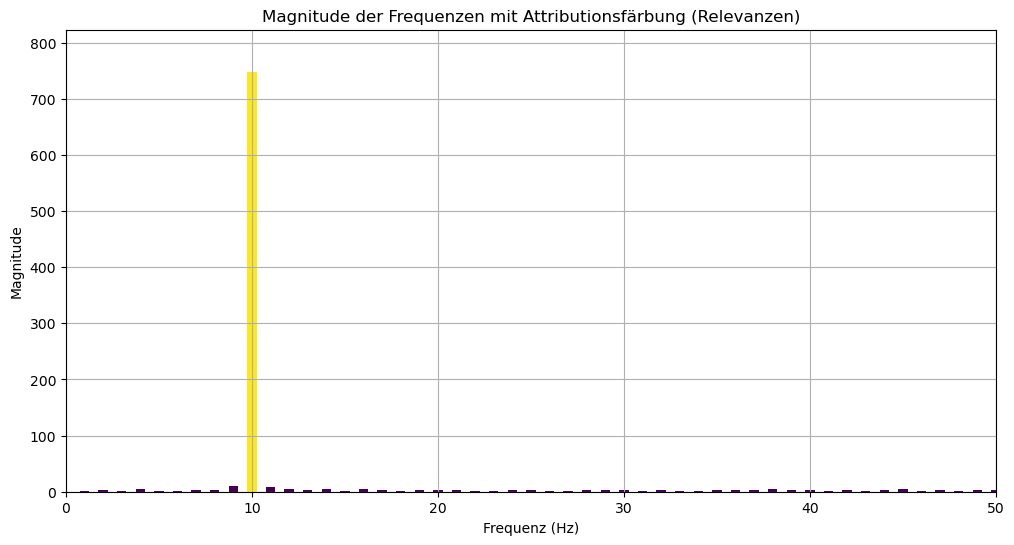

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from captum.attr import IntegratedGradients

# Berechnung der Frequenzen und Magnitudes aus der FFT
def visualize_frequency_attributions(data_fft, attributions_magnitude):
    # Berechne die Frequenzen für die x-Achse
    frequencies = np.fft.fftfreq(len(data_fft), d=1/1000)  # d=1/1000 für die Samplingrate von 1000 Hz

    # Berechne den Betrag der Fourier-Transformation
    fft_magnitude = np.abs(data_fft)

    # Erstelle den Bar Plot für die Magnitude der Frequenzen mit Attributionsfärbung
    plt.figure(figsize=(12, 6))

    # Nur die positive Frequenzhälfte für die Visualisierung
    positive_freq_indices = frequencies > 0
    plt.bar(frequencies[positive_freq_indices], 
            fft_magnitude[positive_freq_indices],
            color=plt.cm.viridis(attributions_magnitude[positive_freq_indices] / np.max(attributions_magnitude)),  # Farbskala basierend auf den Attributionswerten
            width=0.5)  # Balkenbreite anpassen

    plt.title('Magnitude der Frequenzen mit Attributionsfärbung (Relevanzen)')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.xlim(0, 50)  # Begrenze die x-Achse auf einen Bereich von 0 bis 50 Hz
    plt.ylim(0, np.max(fft_magnitude) * 1.1)  # Setze y-Achse basierend auf den maximalen Magnituden
    pdf_file.savefig()
    plt.show()

# Beispielaufruf der Funktion
visualize_frequency_attributions(data_fft, attributions_magnitude)

In [16]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


### Extra plot

In [36]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


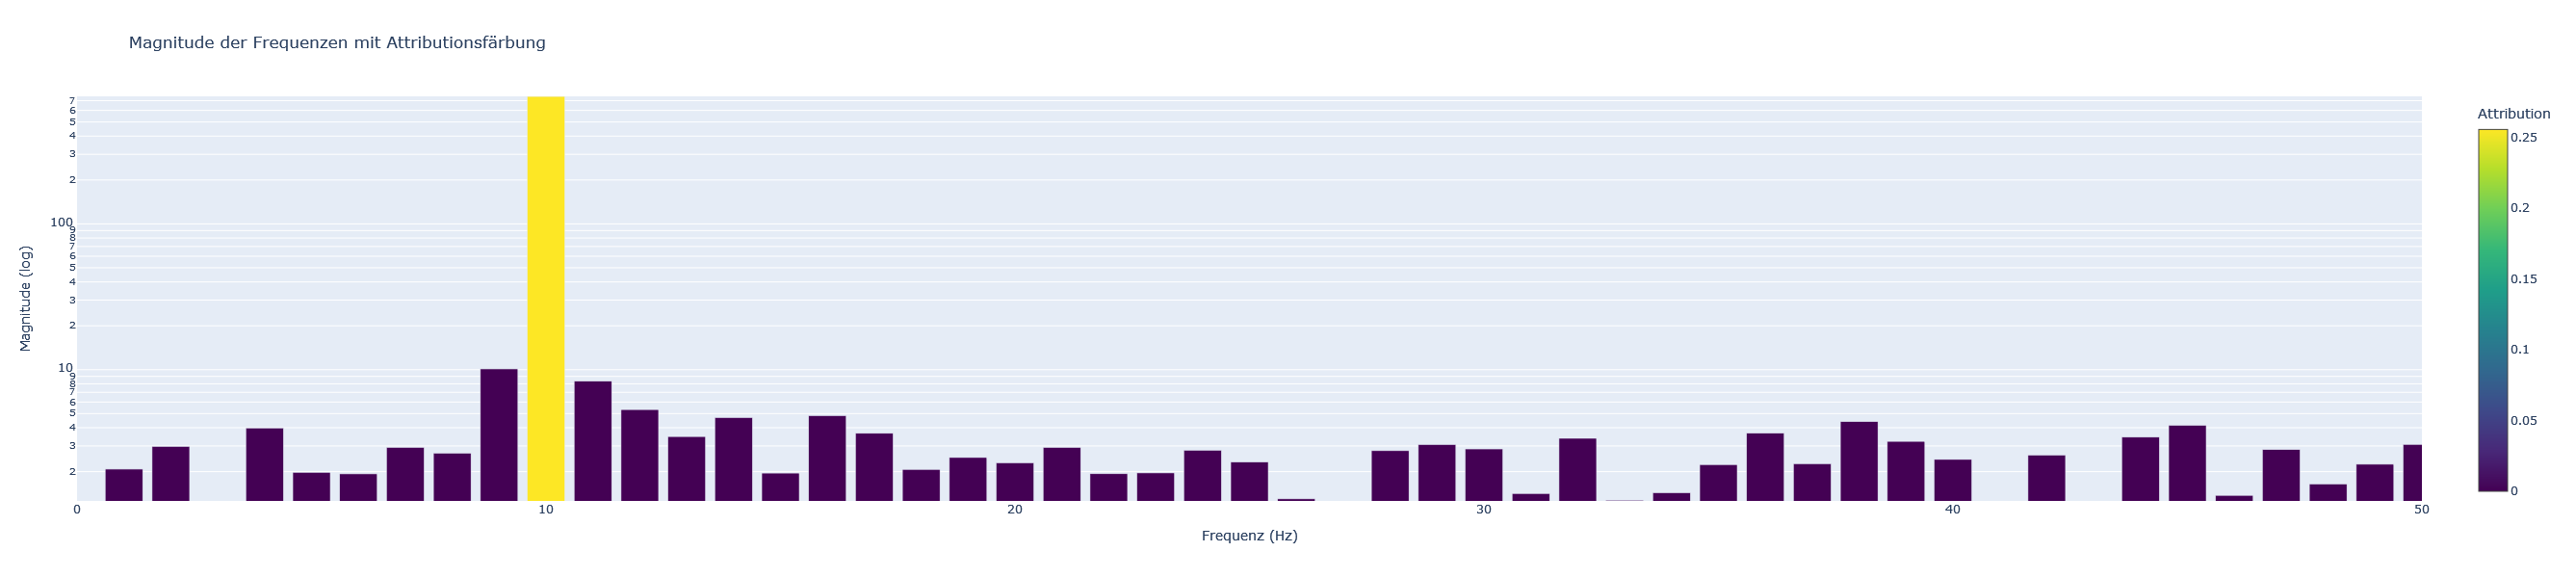

In [62]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.image as mpimg

def visualize_frequency_attributions_plotly(data_fft, attributions_magnitude):
    # Berechne die Frequenzen für die x-Achse
    frequencies = np.fft.fftfreq(len(data_fft), d=1/1000)  # d=1/1000 für die Samplingrate von 1000 Hz

    # Berechne den Betrag der Fourier-Transformation
    fft_magnitude = np.abs(data_fft)

    # Nur die positive Frequenzhälfte für die Visualisierung
    positive_freq_indices = frequencies > 0
    frequencies_positive = frequencies[positive_freq_indices]
    magnitudes_positive = fft_magnitude[positive_freq_indices]
    attributions_positive = attributions_magnitude[positive_freq_indices]

    # Erstelle den Plot
    fig = go.Figure(data=[
        go.Bar(
            x=frequencies_positive,
            y=magnitudes_positive,
            marker=dict(
                color=attributions_positive,
                colorscale='Viridis',
                colorbar=dict(title='Attribution')
            ),
            hovertemplate='Frequenz: %{x:.2f} Hz<br>Magnitude: %{y:.4f}<br>Attribution: %{marker.color:.4f}<extra></extra>'
        )
    ])

    # Layout anpassen
    fig.update_layout(
        title='Magnitude der Frequenzen mit Attributionsfärbung',
        xaxis_title='Frequenz (Hz)',
        yaxis_title='Magnitude',
        xaxis=dict(range=[0, 50]),  # Begrenze die x-Achse auf 0 bis 50 Hz
        yaxis=dict(type='log', title='Magnitude (log)', range=[0.1, np.log10(np.max(magnitudes_positive) + 1)]),  # Setze y-Achse logarithmisch
        height=600  # Erhöhe die Höhe des Plots
    )
    # Speichere den Plot als PNG-Bild
    fig.write_image("plotly_graph.png")

    # Lade das gespeicherte Bild (Plotly-Graph als PNG)
    img = mpimg.imread("plotly_graph.png")

    # Ermittle die Dimensionen des Bildes
    height, width, _ = img.shape

    # Umrechnung der Bildgröße in Inches (Matplotlib verwendet DPI, normalerweise 100 DPI)
    dpi = 100  # Standardwert für Matplotlib
    figsize = width / dpi, height / dpi  # Breite und Höhe in Inches

    # Erstelle eine Matplotlib-Figur mit der Bildgröße
    plt.figure(figsize=figsize)
    
    # Zeige das Bild in der Matplotlib-Figur an
    plt.imshow(img)
    plt.axis('off')  # Achsen ausschalten
    
    # Speichere die Figur in der PDF-Datei
    pdf_file.savefig()
    plt.close()
    
    # Zeige den Plot an
    fig.show()


# Beispielaufruf der Funktion
visualize_frequency_attributions_plotly(data_fft, attributions_magnitude)

## Save relevant plots to pdf (close)

In [63]:
pdf_file.close()

# Ab hier alte Version und Test (funktioniert nur teilweise)

torch.Size([500, 1000])


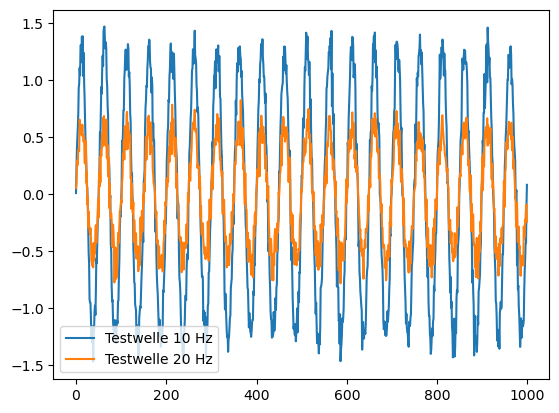

In [14]:
# Generierung der Testdaten
def generate_test_data(num_samples=500, noise_level=0.1):
    X = []
    y = []
    t = np.linspace(0, 1, 1000)  # 1 Sekunde mit 1000 Abtastpunkten

    for i in range(num_samples):
        if np.random.rand() > 0.5:
            # 10 Hz Sinuswelle
            amplitude = np.random.uniform(0.5, 1.5)
            wave = amplitude * np.sin(2 * np.pi * 10 * t)
            label = 0  # Label für 10 Hz
        else:
            # 20 Hz Sinuswelle
            amplitude = np.random.uniform(0.5, 1.5)
            wave = amplitude * np.sin(2 * np.pi * 20 * t)
            label = 1  # Label für 20 Hz

        # Füge Rauschen hinzu
        wave += np.random.normal(0, noise_level, size=t.shape)

        X.append(wave)
        y.append(label)

    # Konvertiere in NumPy-Arrays
    X = np.array(X)
    y = np.array(y)

    # Konvertiere in PyTorch-Tensoren
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    return X, y

# Testdaten generieren
X_test, y_test = generate_test_data(num_samples=500, noise_level=0.1)

print(np.shape(X_test))

# Beispielplot der Testdaten
plt.plot(X_test[0].numpy(), label="Testwelle 10 Hz")
plt.plot(X_test[1].numpy(), label="Testwelle 20 Hz")
plt.legend()
plt.show()

In [18]:
# Testdaten evaluieren
def evaluate_model(model, X_test, y_test):
    model.eval()  # Setze das Modell in den Evaluierungsmodus
    with torch.no_grad():  # Deaktiviere das Gradient Tracking
        outputs = model(X_test).squeeze()  # Vorhersagen des Modells
        test_loss = torch.nn.functional.binary_cross_entropy_with_logits(outputs, y_test)  # Verlust berechnen
        predicted_classes = (torch.sigmoid(outputs) > 0.5).int()  # Vorhersagen (0 oder 1)

    # Genauigkeit berechnen
    test_accuracy = (predicted_classes == y_test.int()).float().mean().item()

    return test_loss.item(), test_accuracy, predicted_classes

# Testdaten evaluieren
test_loss, test_accuracy, predicted_classes = evaluate_model(model, X_test, y_test)

print(f'Testverlust: {test_loss:.4f}')
print(f'Testgenauigkeit: {test_accuracy:.4f}')

for i in range(10):
    print(f'Welle {i}: Vorhersage: {predicted_classes[i].item()}, Tatsächliches Label: {y_test[i].item()}')

# Überprüfen, ob alle Vorhersagen korrekt sind
incorrect_indices = [i for i in range(len(predicted_classes)) if predicted_classes[i] != y_test[i]]
if not incorrect_indices:
    print(f'Alle Vorhersagen sind korrekt.')
else:
    print(f'Fehlerhafte Vorhersagen an den Indizes: {incorrect_indices}')

Testverlust: 0.5032
Testgenauigkeit: 1.0000
Welle 0: Vorhersage: 1, Tatsächliches Label: 1.0
Welle 1: Vorhersage: 1, Tatsächliches Label: 1.0
Welle 2: Vorhersage: 1, Tatsächliches Label: 1.0
Welle 3: Vorhersage: 1, Tatsächliches Label: 1.0
Welle 4: Vorhersage: 0, Tatsächliches Label: 0.0
Welle 5: Vorhersage: 0, Tatsächliches Label: 0.0
Welle 6: Vorhersage: 0, Tatsächliches Label: 0.0
Welle 7: Vorhersage: 1, Tatsächliches Label: 1.0
Welle 8: Vorhersage: 0, Tatsächliches Label: 0.0
Welle 9: Vorhersage: 1, Tatsächliches Label: 1.0
Alle Vorhersagen sind korrekt.


In [6]:
pip install captum

  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
Using cached captum-0.7.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


20.0


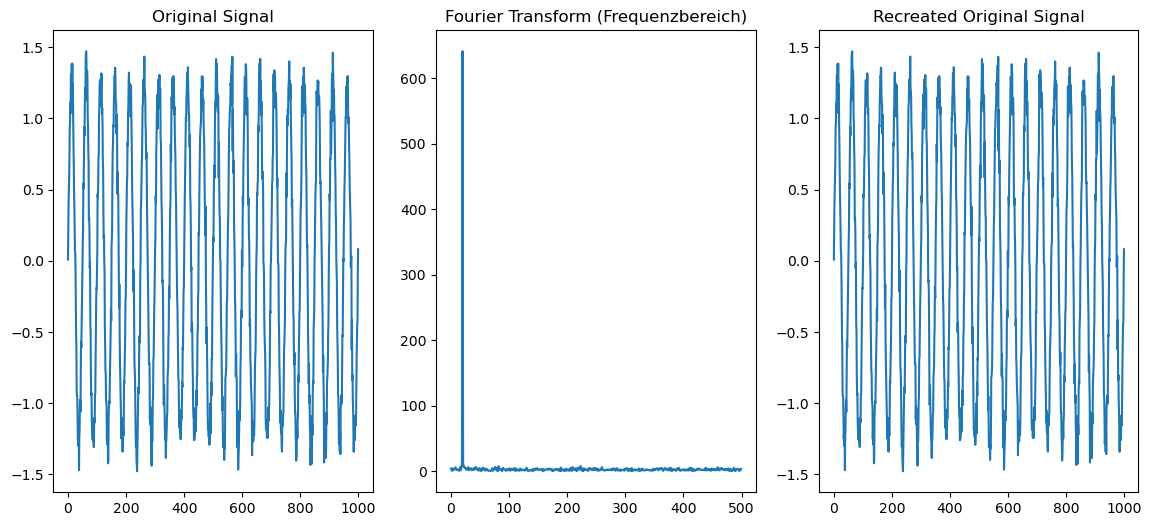

In [19]:
# Fourier-Transformation auf die Testdaten anwenden
def apply_fft_to_test_data(X_test):
    fft_transformed_data = []
    
    for signal in X_test:
        # Fourier-Transformation des Signals
        fft_signal = np.fft.fft(signal)
        fft_transformed_data.append(fft_signal)
    
    return np.array(fft_transformed_data)

# Fourier-Transformation auf Testdaten anwenden
fft_test_data = apply_fft_to_test_data(X_test)

# Inverse Fourier-Transformation auf die FFT-Testdaten anwenden
def apply_ifft_to_fft_data(fft_test_data):
    ifft_transformed_data = []
    
    for fft_signal in fft_test_data:
        # Inverse Fourier-Transformation des Signals
        ifft_signal = np.fft.ifft(fft_signal)
        ifft_transformed_data.append(ifft_signal.real)  # Nur der reale Teil ist das rekonstruierte Signal
    
    return np.array(ifft_transformed_data)

# Beispielanwendung der Inversen FFT auf die Fourier-transformierten Testdaten
ifft_test_data = apply_ifft_to_fft_data(fft_test_data)

# Beispielhafte Darstellung der Fourier-Transformation einer Welle
def plot_fft(signal, fft_signal, ifft_signal, sample_rate=1000):
    # Zeitbereich (Originalsignal)
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 3, 1)
    plt.plot(signal)
    plt.title("Original Signal")

    # Frequenzbereich (Fourier-Transformation)
    freqs = np.fft.fftfreq(len(signal), 1 / sample_rate)  # Frequenzen in Hz
    print(freqs[np.argmax(np.abs(fft_signal[:len(fft_signal)//2]))])
    plt.subplot(1, 3, 2)
    plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal[:len(fft_signal)//2]))  # Zeigt die Magnitude der Frequenzen
    plt.title("Fourier Transform (Frequenzbereich)")

    plt.subplot(1, 3, 3)
    plt.plot(ifft_signal)
    plt.title("Recreated Original Signal")
    
    plt.show()

# Plot für das erste Testsignal
plot_fft(X_test[0], fft_test_data[0], ifft_test_data[0])

In [20]:
import numpy as np
import torch

# 1. Umwandlung von X_test in ein NumPy Array
X_test_np = X_test.numpy()

# 2. Anwendung der Fourier-Transformation auf jede Zeitreihe (jede Zeile von X_test)
X_test_fft = np.fft.fft(X_test_np, axis=1)

# 3. Rückumwandlung in Torch Tensor (falls erforderlich)
X_test_fft_tensor = torch.tensor(X_test_fft, dtype=torch.complex64)

# Ausgabe der Form der Fourier-transformierten Daten
print(f"Shape von X_test_fft: {X_test_fft_tensor.shape}")

Shape von X_test_fft: torch.Size([500, 1000])


In [24]:
import torch
import torch.fft

class S_model(nn.Module):
    def __init__(self, model):
        super(S_model, self).__init__()
        self.model = model  # Das trainierte Modell wird hier eingebettet

    def forward(self, y):
        # Schritt 1: Inverse Fourier-Transformation mit PyTorch
        x_reconstructed = torch.fft.ifft(y, dim=1).real  # Wir nehmen nur den realen Teil
        
        # Schritt 2: Das rekonstruierte Signal an das Modell weiterleiten
        output = self.model(x_reconstructed)
        
        return output

# Erstelle eine Instanz von S_model
S_instance = S_model(model)

In [26]:
!pip install captum

  Using cached captum-0.7.0-py3-none-any.whl.metadata (26 kB)
Using cached captum-0.7.0-py3-none-any.whl (1.3 MB)


In [31]:
from captum.attr import IntegratedGradients

# 1. Initialisiere Integrated Gradients mit der zusammengesetzten Funktion S
ig = IntegratedGradients(S_instance)

# 2. Wähle eine Baseline (0 in deinem Fall)
baseline = torch.zeros_like(X_test_fft_tensor)

# 3. Berechnung der Integrated Gradients für S(y) mit einem Ziel (z.B. Klasse für 20 Hz)
target = 0  # Falls die 20 Hz Welle einer bestimmten Klasse im Modell entspricht
attributions, delta = ig.attribute(X_test_fft_tensor, baseline, target=target, return_convergence_delta=True)

# 4. Ausgabe der Attributions
print("Integrated Gradients Attributions:", attributions)
print("Convergence Delta:", delta)

Integrated Gradients Attributions: tensor([[ 1.2685e-06-0.0000e+00j, -5.3063e-06-1.2003e-05j,
          8.6638e-07+4.2701e-07j,  ...,
         -2.8312e-06-1.9780e-05j,  8.6638e-07-4.2701e-07j,
         -5.3063e-06+1.2003e-05j],
        [ 2.2049e-07-0.0000e+00j, -6.7650e-06+9.6733e-06j,
          1.9801e-06+1.0468e-05j,  ...,
         -5.1118e-05-2.7020e-05j,  1.9801e-06-1.0468e-05j,
         -6.7650e-06-9.6733e-06j],
        [ 6.7424e-07-0.0000e+00j, -2.8059e-06+9.2370e-07j,
         -2.6099e-06-9.7841e-08j,  ...,
          1.7225e-05+3.1320e-06j, -2.6099e-06+9.7841e-08j,
         -2.8059e-06-9.2370e-07j],
        ...,
        [-4.6905e-06+0.0000e+00j, -7.3218e-06-7.4301e-06j,
          1.6846e-05-7.8122e-07j,  ...,
         -2.4940e-05+1.5115e-05j,  1.6846e-05+7.8122e-07j,
         -7.3218e-06+7.4301e-06j],
        [ 6.0264e-06+0.0000e+00j, -1.3154e-05+1.7893e-05j,
          3.8273e-05-4.3419e-05j,  ...,
         -2.7594e-05+2.2612e-05j,  3.8273e-05+4.3419e-05j,
         -1.3154e-05-1

In [43]:
import torch
import numpy as np

# 1. Erstelle eine 20 Hz Welle mit Rauschen
sampling_rate = 100  # Annahme der Sampling-Rate
t = np.arange(0, 1, 1/sampling_rate)
signal = 0.5 * np.sin(2 * np.pi * 20 * t) + 0.1 * np.random.normal(size=t.shape)  # 20 Hz Welle mit Rauschen

# 2. Berechne die Fourier-Transformation der Welle
wave_fft = np.fft.fft(signal)

# 3. Nehme nur den positiven Teil der Fourier-Transformation
wave_fft_positive = wave_fft[:len(wave_fft)//2]  # Positiver Teil

# 4. Konvertiere die Fourier-Transformation in ein PyTorch Tensor für den Input ins Modell
wave_fft_tensor = torch.tensor(np.real(wave_fft_positive), dtype=torch.float32).unsqueeze(0)  # Konvertiere zu realem Teil und füge Batch-Dimension hinzu

# 5. Werte die FT in Modell S aus
# Angenommen, S_instance ist dein trainiertes Modell
with torch.no_grad():  # Deaktiviere Gradientenberechnung
    output = S_instance(wave_fft_tensor)

# 6. Ausgabe der Klasse
predicted_class = torch.argmax(output, dim=1)
print("Vorhergesagte Klasse:", predicted_class.item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x50 and 1000x64)

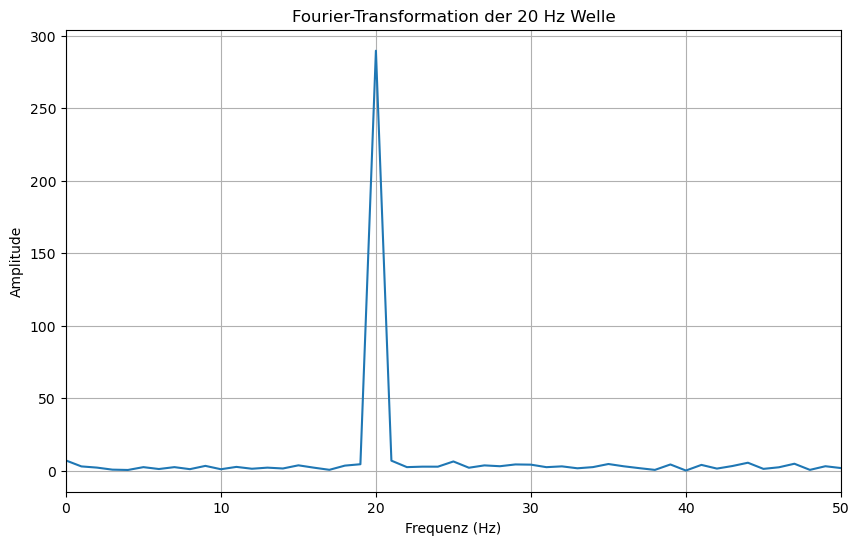

Frequenz mit den höchsten Attributions: 20.0


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Berechne die Frequenzen, die mit X_test_fft_tensor korrespondieren
sampling_rate = 1000  # Sampling-Rate (Hz)
num_samples = X_test_fft_tensor.size(1)  # Anzahl der Samples in der Welle
frequencies = np.fft.fftfreq(num_samples, d=1/sampling_rate)

# 2. Nimm die Fourier-Transformation der 20 Hz Welle
X_test_fft_20hz_np = X_test_fft_20hz.detach().cpu().numpy()

# 3. Berechne die Amplituden (absoluter Betrag der komplexen Werte)
amplitudes = np.abs(X_test_fft_20hz_np)

# 4. Darstellung der Fourier-Transformation der 20 Hz Welle
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:num_samples // 2], amplitudes[:num_samples // 2])  # Nur positive Frequenzen darstellen
plt.title("Fourier-Transformation der 20 Hz Welle")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 50)  # Begrenze die Frequenzanzeige auf 0-50 Hz
plt.show()



import torch
import numpy as np
from captum.attr import IntegratedGradients

# 1. Wähle eine 20 Hz Welle aus den Testdaten
sampling_rate = 1000  # Angenommene Sampling-Rate
num_samples = X_test_fft_tensor.size(1)
frequencies = np.fft.fftfreq(num_samples, d=1/sampling_rate)

# Wähle einen Testdatensatz aus, bei dem die Fourier-Transformation bei 20 Hz dominant ist
# Hier nehmen wir den ersten Datensatz als Beispiel
X_test_fft_20hz = X_test_fft_tensor[0]

# 2. Initialisiere Integrated Gradients mit der zusammengesetzten Funktion S
ig = IntegratedGradients(S_instance)

# 3. Wähle eine Baseline (0 in deinem Fall)
baseline = torch.zeros_like(X_test_fft_20hz).unsqueeze(0)  # Fügt eine Batch-Dimension hinzu

# 4. Berechnung der Integrated Gradients für die 20 Hz Welle ohne target
attributions, delta = ig.attribute(X_test_fft_20hz.unsqueeze(0), baseline, return_convergence_delta=True)

# 5. Konvertiere die Attributions zu einem NumPy-Array und finde die Frequenz mit den höchsten Attributions
attributions_np = attributions.detach().cpu().numpy()
mean_attributions = np.mean(np.abs(attributions_np), axis=0)

# Finde die Frequenz mit dem höchsten Attributionswert
max_attribution_index = np.argmax(mean_attributions)
max_attribution_frequency = frequencies[max_attribution_index]

# 6. Ausgabe der Frequenz mit den höchsten Attributions
print("Frequenz mit den höchsten Attributions:", np.abs(max_attribution_frequency))

In [41]:
import torch
import torch.nn as nn
import torch.fft
from captum.attr import IntegratedGradients

class S_model(nn.Module):
    def __init__(self, model):
        super(S_model, self).__init__()
        self.model = model  # Das trainierte Modell wird hier eingebettet

    def forward(self, y):
        # Schritt 1: Inverse Fourier-Transformation mit PyTorch
        x_reconstructed = torch.fft.ifft(y, dim=1).real  # Wir nehmen nur den realen Teil
        
        # Schritt 2: Das rekonstruierte Signal an das Modell weiterleiten
        output = self.model(x_reconstructed)
        
        return output

# Erstelle eine Instanz von S_model
S_instance = S_model(model)

# 1. Initialisiere Integrated Gradients mit der zusammengesetzten Funktion S
ig = IntegratedGradients(S_instance)

# 2. Wähle eine Baseline (0 in deinem Fall)
baseline = torch.zeros_like(X_test_fft_tensor)

# 3. Berechnung der Integrated Gradients für S(y)
attributions, delta = ig.attribute(X_test_fft_tensor, baseline, return_convergence_delta=True)

# 4. Skalierung und Summation der Gradienten (Fourier-Gradienten)
fourier_gradients = torch.zeros_like(X_test_fft_tensor)

for j in range(X_test_fft_tensor.size(1)):
    alpha_steps = torch.linspace(0, 1, steps=100)  # Schritte von 0 bis 1
    for alpha in alpha_steps:
        fourier_gradients[:, j] += (X_test_fft_tensor[:, j] * attributions[:, j] * alpha)

# 5. Ausgabe der Attributions und Fourier-Gradienten
print("Integrated Gradients Attributions:", attributions)
#print("Convergence Delta:", delta)
print("Fourier-Gradienten für den Input:", fourier_gradients)

Integrated Gradients Attributions: tensor([[ 3.6296e-05+0.0000e+00j,  3.0923e-06+5.5909e-05j,
         -2.1974e-05+6.8401e-06j,  ...,
         -2.7737e-05-6.9477e-06j, -2.1974e-05-6.8402e-06j,
          3.0923e-06-5.5909e-05j],
        [-4.9095e-05+0.0000e+00j, -9.1583e-06-5.9840e-06j,
         -1.4331e-05-1.3417e-05j,  ...,
         -6.9224e-06+5.5971e-07j, -1.4331e-05+1.3417e-05j,
         -9.1583e-06+5.9840e-06j],
        [ 2.8165e-06+0.0000e+00j,  3.3822e-06-2.5609e-06j,
         -1.8601e-05-2.1376e-05j,  ...,
         -1.6599e-05-7.8468e-05j, -1.8601e-05+2.1376e-05j,
          3.3822e-06+2.5609e-06j],
        ...,
        [ 1.9895e-06+0.0000e+00j,  5.0911e-06-3.2386e-05j,
          8.6048e-06-5.9130e-06j,  ...,
         -3.7775e-05-1.1047e-05j,  8.6048e-06+5.9130e-06j,
          5.0911e-06+3.2386e-05j],
        [ 1.9332e-05+0.0000e+00j, -2.6134e-06+7.2961e-06j,
          3.3487e-06+3.2834e-05j,  ...,
         -5.0791e-06+1.7475e-05j,  3.3487e-06-3.2834e-05j,
         -2.6134e-06-7

In [60]:
import numpy as np
import torch

# Anzahl der Frequenzen
num_samples = X_test_fft_tensor.size(0)
num_frequencies = X_test_fft_tensor.size(1)

# Abtastfrequenz in Hz
fs = 1000  # Diese muss dem Datenformat entsprechen

# Erzeuge Frequenzen von 0 bis fs/2
frequencies = np.linspace(0, fs / 2, num_frequencies // 2 + 1)

# Erstelle ein Maskenarray für Frequenzen von 0 bis 30 Hz
frequency_mask = frequencies <= 30

# Extrahiere die Amplituden und Frequenzen für Frequenzen von 0 bis 30 Hz
X_test_fft_filtered = X_test_fft_tensor[:, :num_frequencies // 2 + 1]  # Nur positive Frequenzen
X_test_fft_filtered = X_test_fft_filtered[:, frequency_mask]  # Tensor für Frequenzen von 0 bis 30 Hz
frequencies_filtered = frequencies[frequency_mask]  # Frequenzen von 0 bis 30 Hz

# Konvertiere die Amplituden in ein NumPy Array (Beträge)
amplitudes_filtered = torch.abs(X_test_fft_filtered).detach().numpy()

In [68]:
import numpy as np

# Nehme an, dass 'attributions' ein Tensor der Form (n_samples, n_frequencies) ist
# und 'frequencies_filtered' die Frequenzen von 0 bis 30 Hz repräsentiert.

# Umwandeln der Attributions zu NumPy Array für einfachere Verarbeitung
attributions_np = attributions.numpy()  # (n_samples, n_frequencies)

# Wähle die Attributions für das erste Testbeispiel (z.B. Test Sample 1)
attributions_first_sample = attributions_np[0]  # Erster Testdaten-Satz

# Erstelle ein Array mit Frequenzen
frequencies_np = frequencies_filtered  # Frequenzen von 0 bis 30 Hz

# Ordne die Attributions den Frequenzen zu
attribution_frequency_pairs = list(zip(frequencies_np, attributions_first_sample))

# Finde die Frequenz mit dem höchsten Attributionswert
max_attribution_pair = max(attribution_frequency_pairs, key=lambda x: x[1])

# Ausgabe der Frequenz mit dem höchsten Attributionswert
print("Frequenz mit dem höchsten Attributionswert:", max_attribution_pair[0])
print("Höchster Attributionswert:", max_attribution_pair[1])

Frequenz mit dem höchsten Attributionswert: 0.0
Höchster Attributionswert: (3.629599161080608e-05+0j)


In [70]:
import numpy as np

# Nehme an, dass 'fourier_gradients' ein Tensor der Form (n_samples, n_frequencies) ist
# und 'frequencies_filtered' die Frequenzen von 0 bis 30 Hz repräsentiert.

# Umwandeln der Fourier-Gradienten zu NumPy Array für einfachere Verarbeitung
fourier_gradients_np = fourier_gradients.numpy()  # (n_samples, n_frequencies)

# Wähle die Fourier-Gradienten für das erste Testbeispiel (z.B. Test Sample 1)
fourier_gradients_first_sample = fourier_gradients_np[0]  # Erster Testdaten-Satz

# Erstelle ein Array mit Frequenzen
frequencies_np = frequencies_filtered  # Frequenzen von 0 bis 30 Hz

# Ordne die Fourier-Gradienten den Frequenzen zu
fourier_gradient_frequency_pairs = list(zip(frequencies_np, fourier_gradients_first_sample))

# Finde die Frequenz mit dem höchsten Fourier-Gradientenwert
max_fourier_gradient_pair = max(fourier_gradient_frequency_pairs, key=lambda x: x[1])

# Ausgabe der Frequenz mit dem höchsten Fourier-Gradientenwert
print("Frequenz mit dem höchsten Fourier-Gradientenwert:", max_fourier_gradient_pair[0])
print("Höchster Fourier-Gradientenwert:", max_fourier_gradient_pair[1])

Frequenz mit dem höchsten Fourier-Gradientenwert: 24.0
Höchster Fourier-Gradientenwert: (0.015309027+0.0263367j)


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Schritt 1: Konvertiere die Fourier-Gradienten in einen realen Teil (falls nötig)
fourier_gradients_real = torch.real(fourier_gradients)  # Annahme: fourier_gradients ist ein Tensor

# Schritt 2: Erstelle Subplots für die ersten 3 Testdaten
plt.figure(figsize=(15, 5))

for i in range(3):
    # Amplituden der Frequenzen für die i-te Testdaten (X_test_fft_filtered[i])
    amplitudes = amplitudes_filtered[i]
    
    # Schritt 3: Filtere Frequenzen und Amplituden entsprechend den Fourier-Gradienten
    indices = (frequencies_filtered >= 0) & (frequencies_filtered <= 30)
    filtered_frequencies = frequencies_filtered[indices]
    filtered_amplitudes = amplitudes[indices]
    
    # Achte darauf, dass die Fourier-Gradienten entsprechend der Frequenzen gefiltert werden
    filtered_gradients = fourier_gradients_real[i][indices][:len(filtered_frequencies)].numpy()  # Konvertiere zu NumPy für die Farbzuordnung

    # Normalisiere die Farben für die Balken (0-1)
    normalized_colors = (filtered_gradients - np.min(filtered_gradients)) / (np.max(filtered_gradients) - np.min(filtered_gradients))

    # Schritt 4: Erstelle Balkendiagramm
    plt.subplot(1, 3, i + 1)
    plt.bar(filtered_frequencies, filtered_amplitudes, color=plt.cm.viridis(normalized_colors), width=0.4, alpha=0.8)
    plt.title(f'Test Sample {i + 1}')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 30)  # Begrenze die x-Achse auf 0 bis 30 Hz
    plt.grid(axis='y')

plt.suptitle('Amplituden der Frequenzen (0 bis 30 Hz) für die ersten 3 Testdaten')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Für Platz für den Titel
plt.show()

IndexError: The shape of the mask [31] at index 0 does not match the shape of the indexed tensor [1000] at index 0

<Figure size 1500x500 with 0 Axes>